In [1]:
%加载数据集
import numpy as np
import pandas as pd
import mnist_reader
X_train, y_train = mnist_reader.load_mnist('datasets/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('datasets/fashion', kind='t10k')

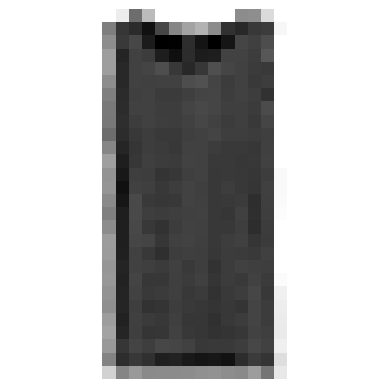

In [6]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
some_digit = X_train[53000]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,
interpolation="nearest")
plt.axis("off")
plt.show()

In [8]:
#输出为上衣类
y_train[53000]

0

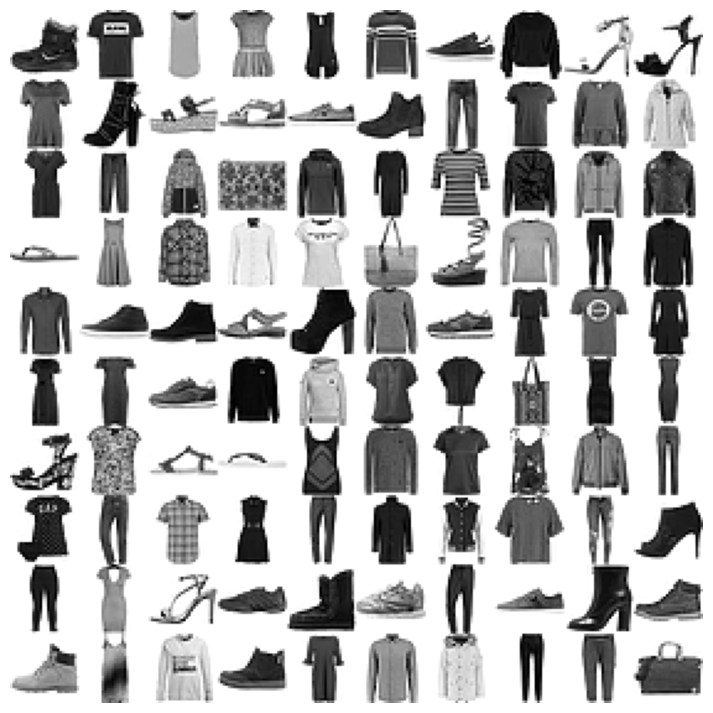

In [10]:
import matplotlib as mpl
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
        interpolation="nearest")
    plt.axis("off")
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    # This is equivalent to n_rows = ceil(len(instances) / images_per_row):
    n_rows = (len(instances) - 1) // images_per_row + 1
    # Append empty images to fill the end of the grid, if needed:
    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size *
size))], axis=0)
    # Reshape the array so it's organized as a grid containing 28×28 images:
    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size,
images_per_row * size)
    # Now that we have a big image, we just need to show it:
    plt.imshow(big_image, cmap = mpl.cm.binary, **options)
    plt.axis("off")
plt.figure(figsize=(9,9))
example_images = X_train[:100]
plot_digits(example_images, images_per_row=10)
plt.show()

In [11]:
import numpy as np
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [15]:
#经过挑选，选择是否为上衣类做分类器标准
y_train_0 = (y_train == 0) # True for all 5s, False for all other digits.
y_test_0 = (y_test == 0)

In [16]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_0)

SGDClassifier(random_state=42)

In [17]:
sgd_clf.predict([some_digit])

array([ True])

In [18]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
skfolds = StratifiedKFold(n_splits=3, random_state=42, shuffle=True)
for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = (y_train_5[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train_5[test_index])
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.9789
0.97735
0.9761


In [19]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_0, cv=3)

In [20]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_0, y_train_pred)

array([[49635,  4365],
       [  696,  5304]], dtype=int64)

In [21]:
y_train_perfect_predictions = y_train_5 # pretend we reached perfection
confusion_matrix(y_train_5, y_train_perfect_predictions)


array([[54000,     0],
       [    0,  6000]], dtype=int64)

In [23]:
from sklearn.metrics import precision_score, recall_score
recall_score(y_train_0, y_train_pred)

0.884

In [24]:
from sklearn.metrics import f1_score
f1_score(y_train_0, y_train_pred)

0.6770055523645415

In [25]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([3321.69301485])

In [26]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)

In [27]:
threshold = 200000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [28]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_0, cv=3,
method="decision_function")

In [29]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_0, y_scores)

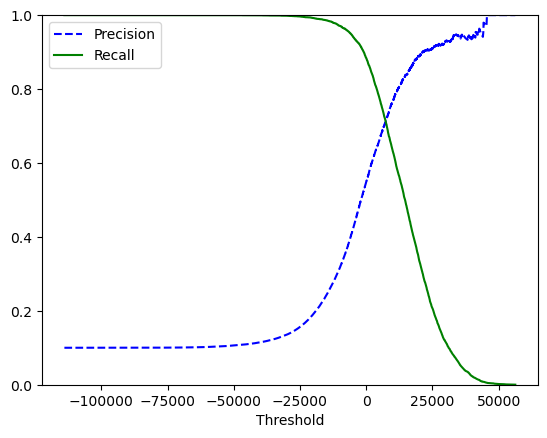

In [30]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

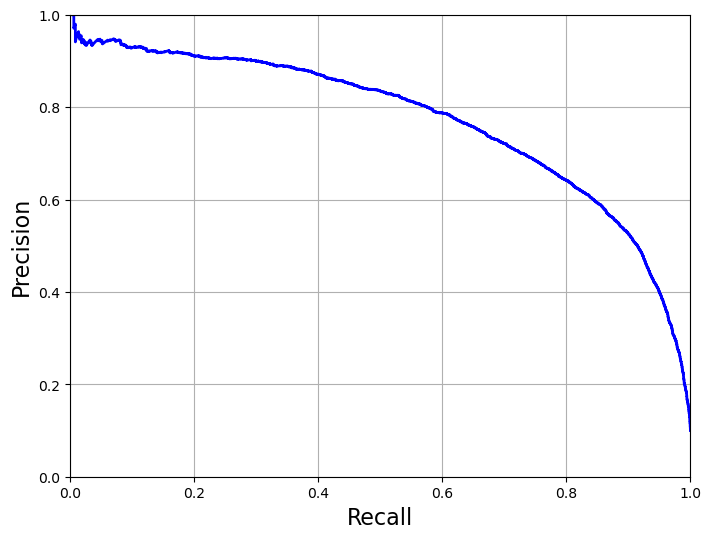

In [31]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)
plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.show()

In [32]:
y_train_pred_90 = (y_scores > 70000)

In [42]:
precision_score(y_train_0, y_train_pred_90)

D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

In [43]:
recall_score(y_train_5, y_train_pred_90)

0.0

In [44]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_0, y_scores)

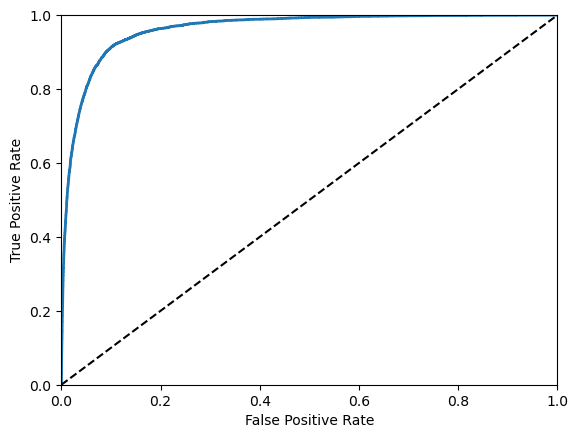

In [45]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
plot_roc_curve(fpr, tpr)
plt.show()

In [47]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_0, y_scores)

0.9622909722222222

In [51]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_0, cv=3,
method="predict_proba")

In [52]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_0,y_scores_forest)

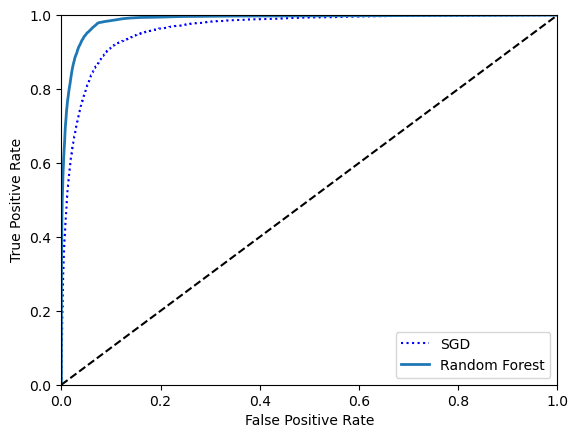

In [53]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [55]:
roc_auc_score(y_train_0, y_scores_forest)

0.9876254413580245

In [56]:
sgd_clf.fit(X_train, y_train) # y_train, not y_train_0
sgd_clf.predict([some_digit])

array([4], dtype=uint8)

In [57]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[  -5637.22509212,  -14818.17361419,   -5322.34490174,
          -6811.0921742 ,   -4469.35210878,  -49547.87286264,
         -16385.58016278, -160194.25413227,  -17509.37485437,
         -97773.58679379]])

In [58]:
#分类最适配的是外套类
np.argmax(some_digit_scores)

4

In [59]:
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [60]:
sgd_clf.classes_[4]

4

In [61]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])

array([3], dtype=uint8)

In [62]:
len(ovo_clf.estimators_)

45

In [63]:
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

array([0], dtype=uint8)

In [64]:
forest_clf.predict_proba([some_digit])

array([[0.9 , 0.  , 0.  , 0.08, 0.  , 0.  , 0.02, 0.  , 0.  , 0.  ]])

In [66]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.7864 , 0.8164 , 0.79335])

In [85]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.8379 , 0.8348 , 0.83525])

In [86]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[4775,   14,   97,  450,   26,    1,  552,    0,   85,    0],
       [  16, 5692,   41,  191,   15,    1,   41,    0,    3,    0],
       [  44,    5, 4394,   99,  745,    0,  655,    0,   58,    0],
       [ 230,   89,   69, 5217,  182,    0,  200,    0,   13,    0],
       [   6,    3,  612,  343, 4456,    0,  559,    0,   21,    0],
       [   3,    3,    3,   13,    0, 5482,   16,  294,   74,  112],
       [ 825,   15,  635,  374,  517,    0, 3449,    1,  183,    1],
       [   0,    0,    0,    0,    0,  299,    0, 5429,   15,  257],
       [  30,    3,   29,  121,   30,    8,  134,   31, 5607,    7],
       [   0,    0,    0,    7,    1,   83,    6,  240,    5, 5658]],
      dtype=int64)

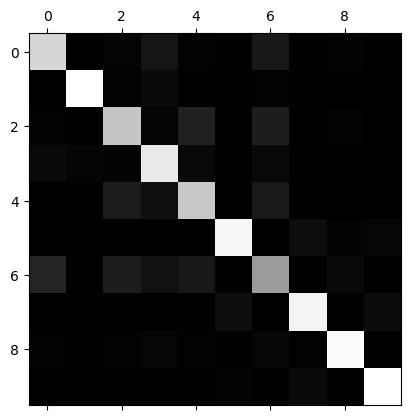

In [88]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()
#可以看到类别4，6对应的格子比较暗淡，分类效果较差

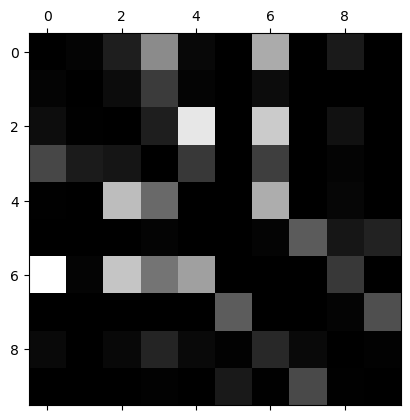

In [90]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()
#通过误差分析可知，标签6非常容易被分类为0、2-4中的种类，标签4与2、3混淆不清，所以分类效果较差。

In [92]:
#增加是否为上身服饰和是否为衣服两个标签，对图像进行多标签分类。
from sklearn.neighbors import KNeighborsClassifier
y_train_clo = (y_train<=4)|(y_train == 6)
y_train_top = (y_train==0)|(y_train==2)|(y_train==6)
y_multilabel = np.c_[y_train_clo, y_train_top]
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [93]:
knn_clf.predict([some_digit])

array([[ True,  True]])

In [95]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_train, cv=3)
f1_score(y_train, y_train_knn_pred, average="macro")

0.8512732541196378

In [99]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# 数据标准化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
X_test_scaled = scaler.transform(X_test.astype(np.float64))

# 定义超参数网格
param_grid = {'n_neighbors': [3, 5, 7, 9, 11], 'weights': ['uniform', 'distance']}

# 使用网格搜索
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', verbose=2)
grid_search.fit(X_train_scaled, y_train)

# 输出最佳超参数组合
print("Best hyperparameters:", grid_search.best_params_)

# 输出在测试集上的精度
print("Test set accuracy:", grid_search.best_estimator_.score(X_test_scaled, y_test))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END .....................n_neighbors=3, weights=uniform; total time=   3.9s
[CV] END .....................n_neighbors=3, weights=uniform; total time=   3.8s
[CV] END .....................n_neighbors=3, weights=uniform; total time=   3.7s
[CV] END .....................n_neighbors=3, weights=uniform; total time=   3.7s
[CV] END .....................n_neighbors=3, weights=uniform; total time=   3.8s
[CV] END ....................n_neighbors=3, weights=distance; total time=   3.7s
[CV] END ....................n_neighbors=3, weights=distance; total time=   4.2s
[CV] END ....................n_neighbors=3, weights=distance; total time=   3.8s
[CV] END ....................n_neighbors=3, weights=distance; total time=   3.9s
[CV] END ....................n_neighbors=3, weights=distance; total time=   3.8s
[CV] END .....................n_neighbors=5, weights=uniform; total time=   4.0s
[CV] END .....................n_neighbors=5, wei